In [1]:
import pandas as pd

In [9]:
endpoints = ['add-buy-offer']
dataToPlot = ['apiTime', 'queueSizeForward']
folders = ['1h']

In [3]:
hardware12 = '12_proc_30_ram'
hardware8 = '8_proc_20_ram'

In [11]:
tests = ['2_repliki', '4_repliki', '6_replik', '8_replik', '10_replik']

In [13]:
tests = ['transakcje_60s', 'transakcje_120s', 'transakcje_180s', 'transakcje_240s', 'transakcje_300s']

In [4]:
tests = ['zapytania_20ms', 'zapytania_100ms', 'zapytania_500ms', 'zapytania_1000ms', 'zapytania_2000ms']

In [ ]:
tests = ['transakcje_180s', 'strategia1_100_strategia2_100_strategia3_100', 'strategia1_200_strategia3_100', 'strategia2_200', 'strategia2_200_strategia3_100', 'strategia3_200']

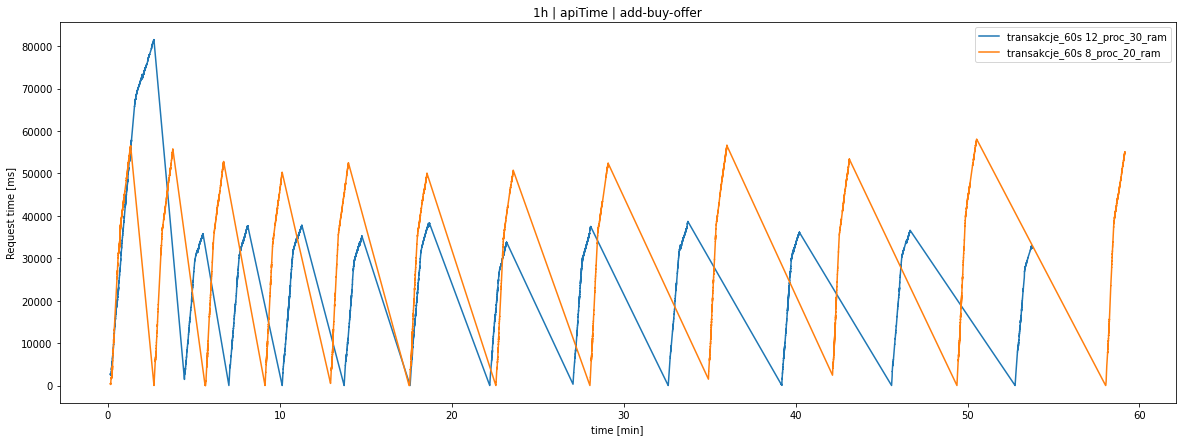

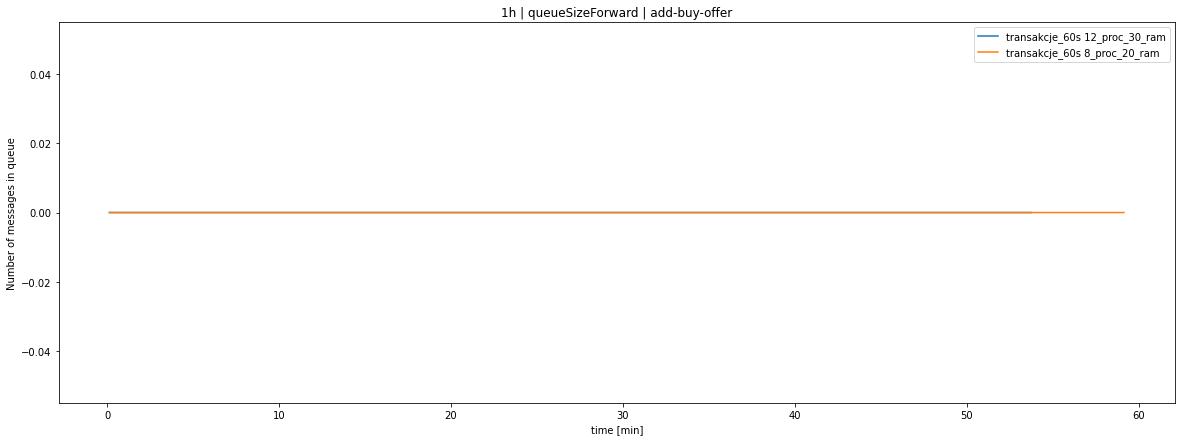

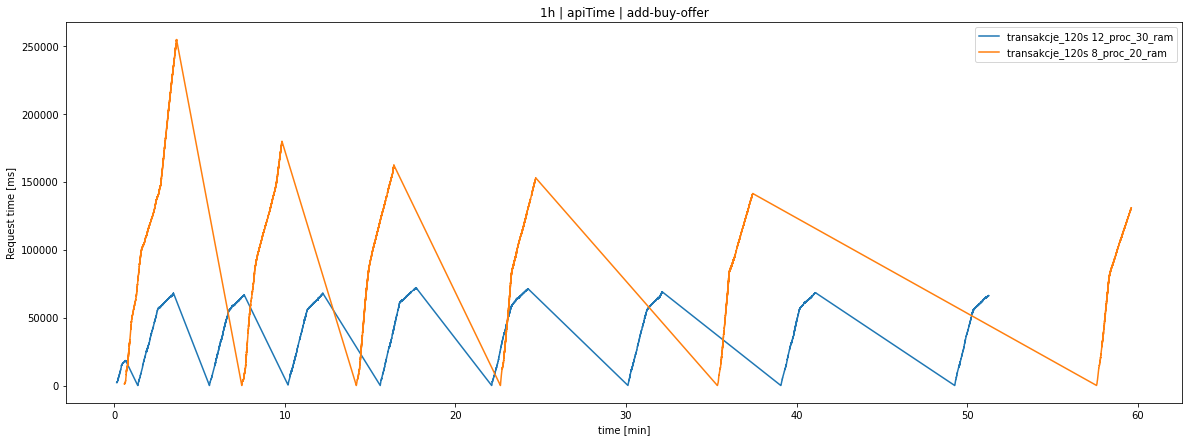

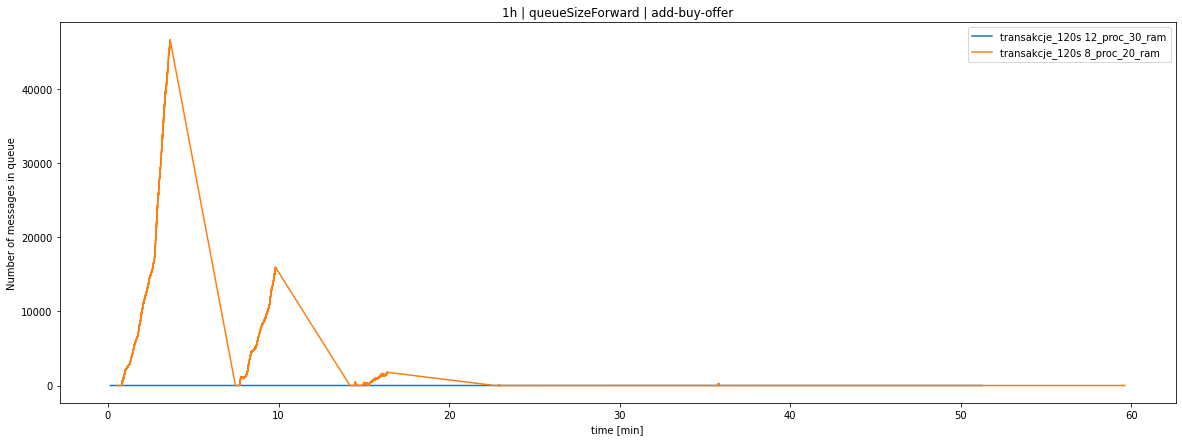

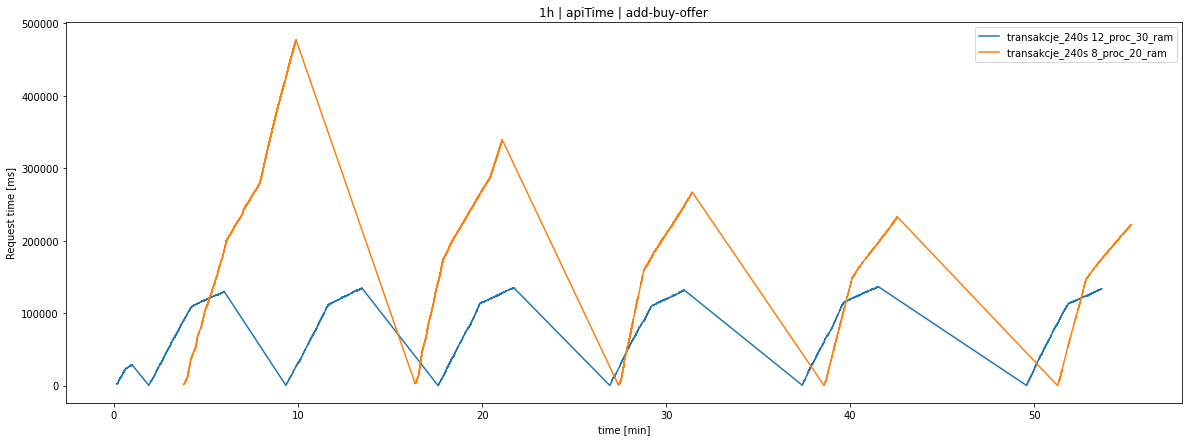

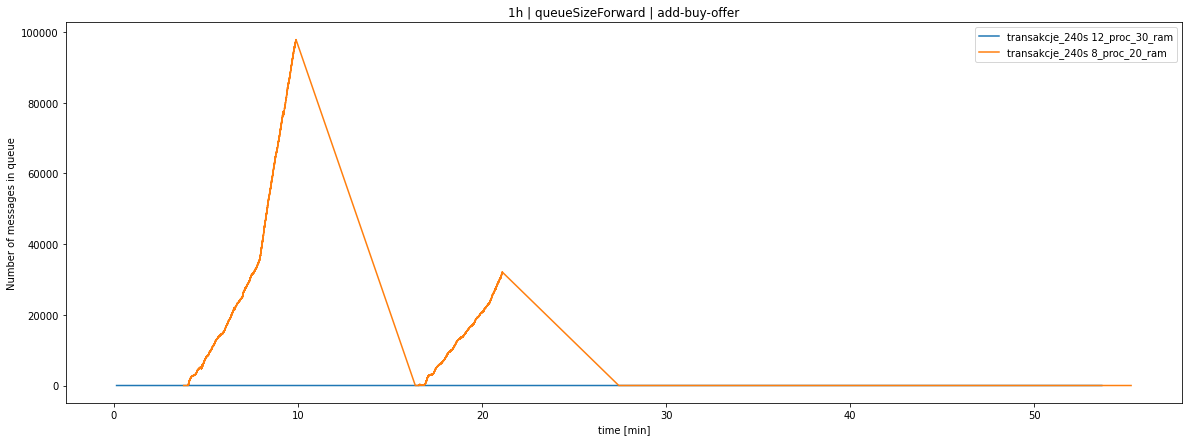

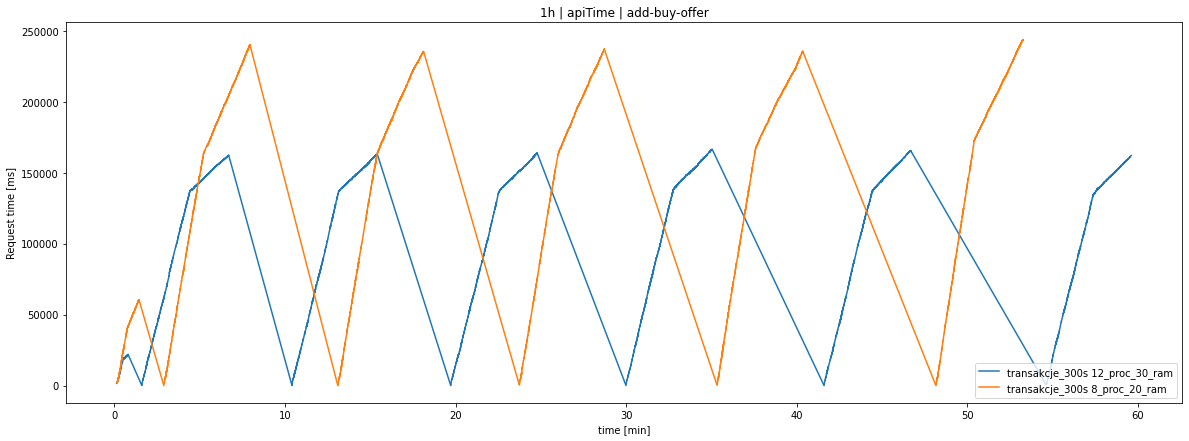

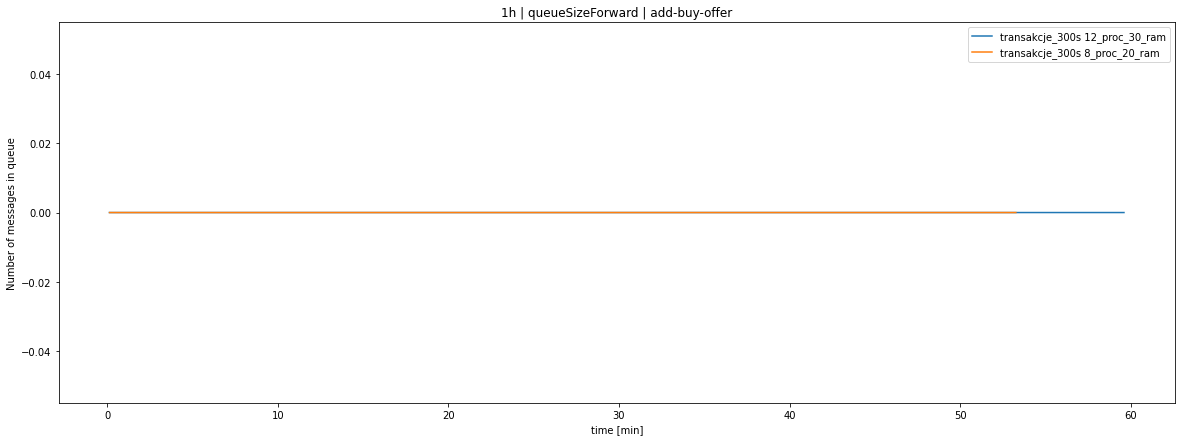

In [14]:
for f in folders:
    for i in tests:
        try:
            d12 = pd.read_csv('Testy/' + hardware12 + '/Testy/' + f + '/' + i + '/methods.csv')
            d8 = pd.read_csv('Testy/' + hardware8 + '/Testy/' + f + '/' + i + '/methods.csv')
        except:
            continue
        for e in endpoints:
            for j in dataToPlot:  
                data = pd.DataFrame()
                d12 = d12.sort_values(by=['timestamp'])
                d8 = d8.sort_values(by=['timestamp'])
                t = d12['timestamp'][0]
                d12['time [min]'] = d12['timestamp'].apply(lambda x: (x - t)/60000)
                t = d8['timestamp'][0]
                d8['time [min]'] = d8['timestamp'].apply(lambda x: (x - t)/60000)
                
                customDataFrame = pd.DataFrame({'time [min]': d12[(d12['endpointUrl'] == e)]['time [min]'], i + ' ' + hardware12: d12[(d12['endpointUrl'] == e)][j]})
                customDataFrame = customDataFrame.loc[customDataFrame['time [min]'] < 60]
                
                data = pd.concat([data, customDataFrame])
                
                customDataFrame = pd.DataFrame({'time [min]': d8[(d8['endpointUrl'] == e)]['time [min]'], i + ' ' + hardware8: d8[(d8['endpointUrl'] == e)][j]})
                customDataFrame = customDataFrame.loc[customDataFrame['time [min]'] < 60]
                
                data = pd.concat([data, customDataFrame])
                
                ax = data.set_index('time [min]').plot(figsize=(20, 7), title = f + ' | ' + j + ' | ' + e)
                ax.set_xlabel("time [min]")
                if j == 'apiTime':
                    ax.set_ylabel("Request time [ms]")
                else:
                    ax.set_ylabel("Number of messages in queue")